In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
cols=['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df=pd.read_csv("auto-mpg.data",names=cols,na_values='?',comment='\t',sep=' ',skipinitialspace=True)
data=df.copy()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
#Explarotary Analysis of Data

print(data.info())  # 8 columns, 398 observations

print(data.isna().sum()) # Horsepower 6 missing values

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
None
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


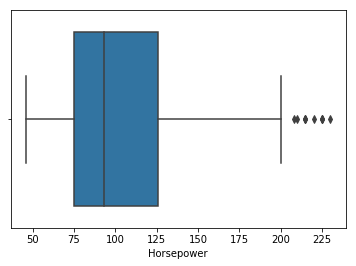

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
#Study Horsepower column 
sns.boxplot(data['Horsepower'])
plt.show()
#Distribution seems to be left skewed so let's use median as impute method

median=data['Horsepower'].median()
data['Horsepower']=data['Horsepower'].fillna(median)
data.info()

In [5]:
#Now looks at category distribution
#As no column has dtype as object but few columns value are repetitive i.e cylinders and Origin

print(data['Cylinders'].value_counts()/len(data))
data['Origin'].value_counts()

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64


1    249
3     79
2     70
Name: Origin, dtype: int64

In [6]:
#Origin varable looks like a cuntry code. Let's convert it
origin_dict={
    1:'India',
    2:'USA',
    3:'Germany'
}
data['Origin']=data.Origin.replace(origin_dict)
data.head()

data=pd.get_dummies(data,prefix='',prefix_sep='')
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,1,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,1,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,1,0


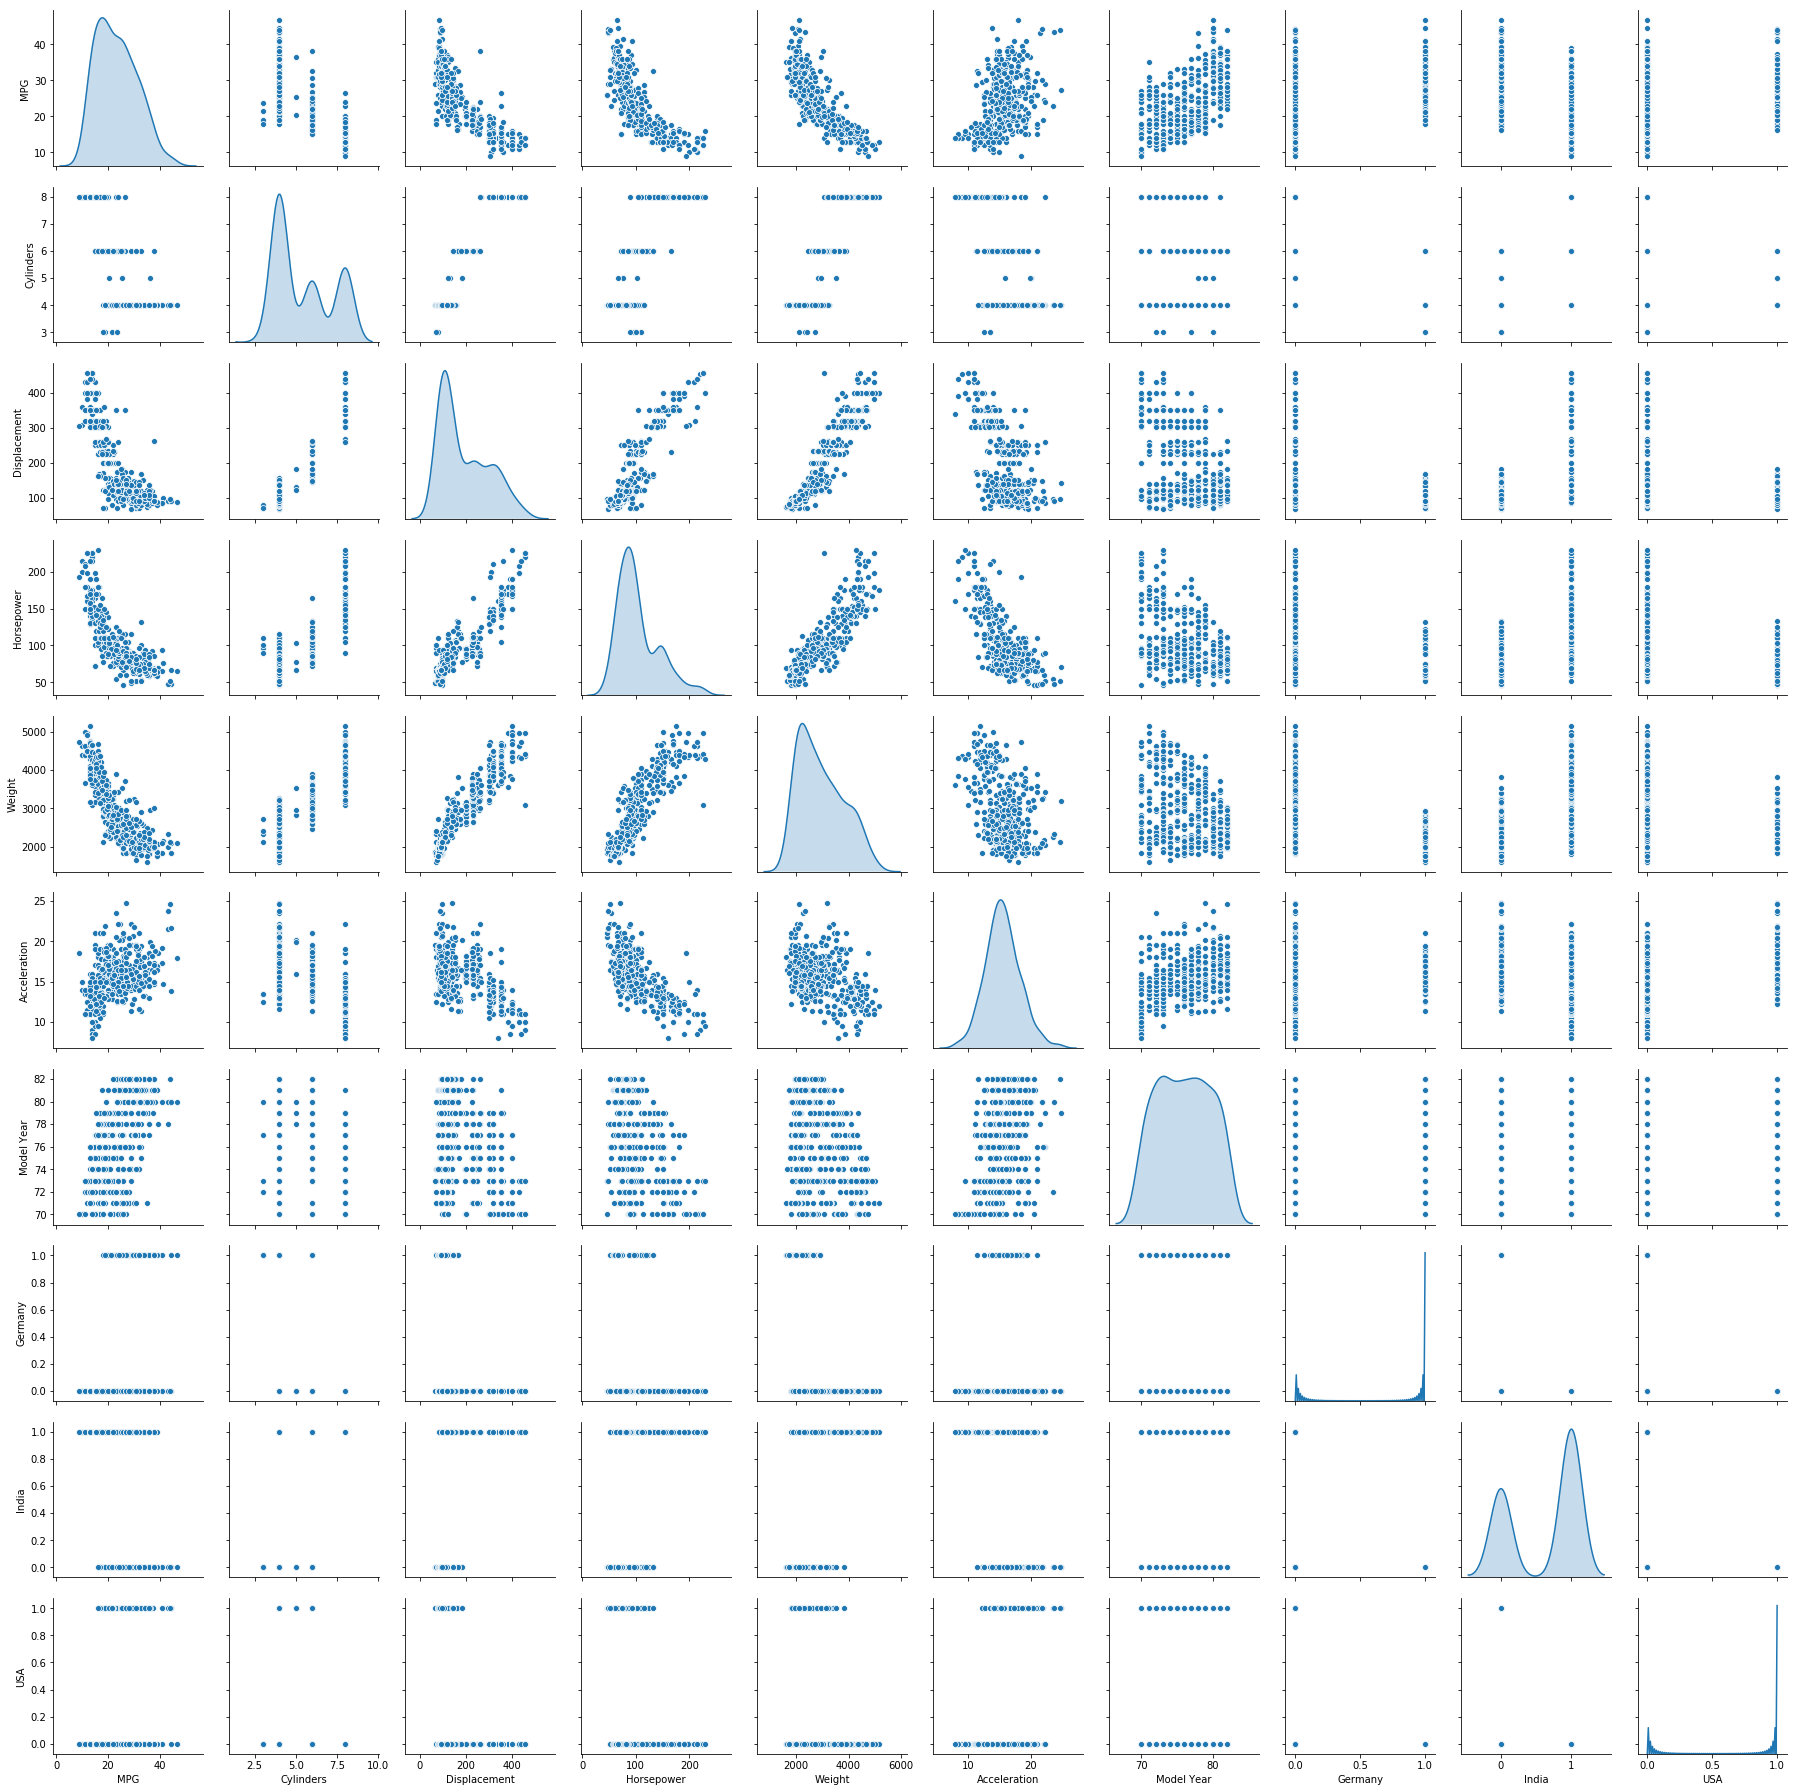

In [7]:
#Coorelation 
sns.pairplot(data,diag_kind='kde')
plt.show()

#Pairplot gives you brief overview as how variables relate to each other

In [8]:
#Train test split using stratified splitting so we have same proportion of values in both sets.

split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['Cylinders']): #Using Cylinder variable for dividing
    strat_train_set= data.loc[train_index]
    strat_test_set= data.loc[test_index]


In [9]:
display("Train_Set")
print(strat_train_set['Cylinders'].value_counts()/len(strat_train_set))
#Found that in inital data and train data values are in same proportion
display("Test_Set")
print(strat_test_set['Cylinders'].value_counts()/len(strat_test_set))

'Train_Set'

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64


'Test_Set'

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64
